# **Guía de Ejercicios: Monte Carlo Markov Chain.**
## **Ejercicio #*1***
Hechemos un vistazo general de los datos provistos por la cátedra mediante un gráfico incluyendo los errores estipulados en la tabla. 


,MAG,PHI,error_inf,error_sup
count,47.000000,47.000000,47.000000,47.000000
mean,-19.628766,0.013708,0.003113,0.004452
std,2.114458,0.014200,0.005078,0.010113
min,-23.183000,0.000003,0.000002,0.000003
25%,-21.397500,0.002149,0.000241,0.000254
50%,-19.634000,0.012255,0.001557,0.001263
75%,-17.844500,0.018638,0.003194,0.003376
max,-16.081000,0.067273,0.027429,0.059439


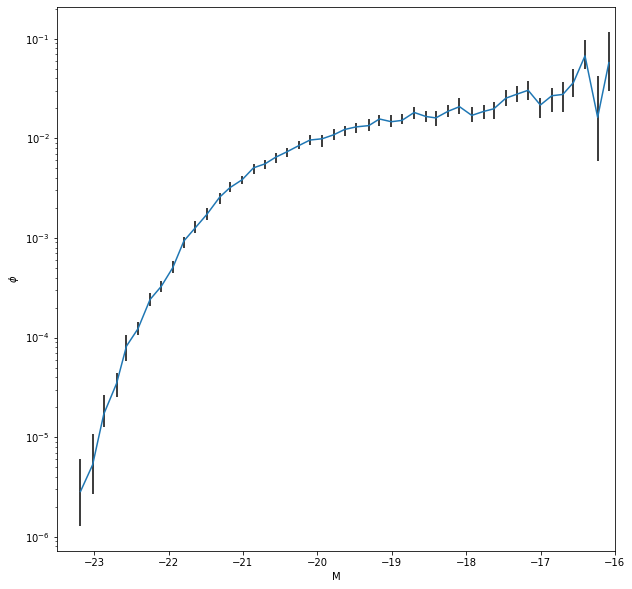

In [ ]:
#Paquetes 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Importar datos de pandas aca 
df = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/Colab Notebooks/datos.csv')

#Grafico con plt.errorbar()
plt.figure(figsize=(10,10))
plt.errorbar(df['MAG'],(df['PHI']),yerr=[df['error_inf'],df['error_sup']],ecolor='black')
plt.xlim([-23.5,-16])
plt.xlabel("M")
plt.ylabel("$\phi$")
plt.semilogy()

df.describe()


Esta función se conoce como **función luminosidad** para una muestra de Galaxias y describe su distribución de acuerdo a la luminosidad/magnitud absoluta de las mismas. De forma esperable, las galaxias más masivas son las menos frecuentes. 

## **Ejercicio #*2***
 La función clásica para ajustar esta distribución de galaxias vs magnitud absoluta es la función de *Schechter*. La misma depende de **tres** parámetros: $Schechter(M_{*},\phi_{*},\alpha)$ y asume la siguiente forma: 

\begin{equation}
 Sch(M,M_{*},\phi_{*},\alpha) dM =  0.4ln(10)\phi_{*}10^{'0.4(M-M_{*})(\alpha+1)}\times exp(-10^{-0.4(M-M_{*})})
\end{equation}

Donde: 

*   $\phi_{*}$ es la densidad de normalización
*   $M_{*}$ es la luminosidad característica. 
*   $\alpha$ es la pendiente del límite menos luminoso. 



Observemos cómo varían las curvas resultantes de acuerdo a los parámetros para definir un rango que eventualmente exploraremos mediante nuestros algoritmos. 




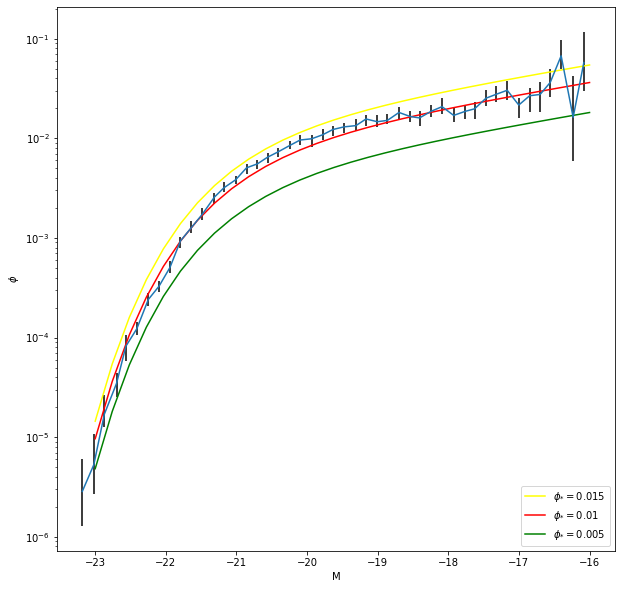

In [ ]:
#VARIEMOS PHI*
#Funciones y variables. 
th1 = [0.01,-21.0,-1.03]
th2 = [0.015,-21.0,-1.03]
th3 = [0.005,-21.0,-1.03]
mtest = np.linspace(-16,-23,num=30)
#Defino la función de Schechter
def sch(th0,th1,th2,x):
  sch1 = 10**(-4*(x-th1)*(th2+1))
  sch2 = np.exp(-10**(-0.4*(x-th1)))
  return 0.4*np.log(10)*th0*sch1*sch2
#Grafico
plt.figure(figsize=(10,10))
plt.errorbar(df['MAG'],(df['PHI']),yerr=[df['error_inf'],df['error_sup']],ecolor='black')
plt.plot(mtest,sch(th2[0],th2[1],th2[2],mtest),color='yellow',label="$\phi_{*}=0.015$")
plt.plot(mtest,sch(th1[0],th1[1],th1[2],mtest),color='red',label="$\phi_{*}=0.01$")
plt.plot(mtest,sch(th3[0],th3[1],th3[2],mtest),color='green',label="$\phi_{*}=0.005$")
plt.xlabel("M")
plt.ylabel("$\phi$")
plt.legend(loc='lower right')
plt.semilogy()
plt.show()

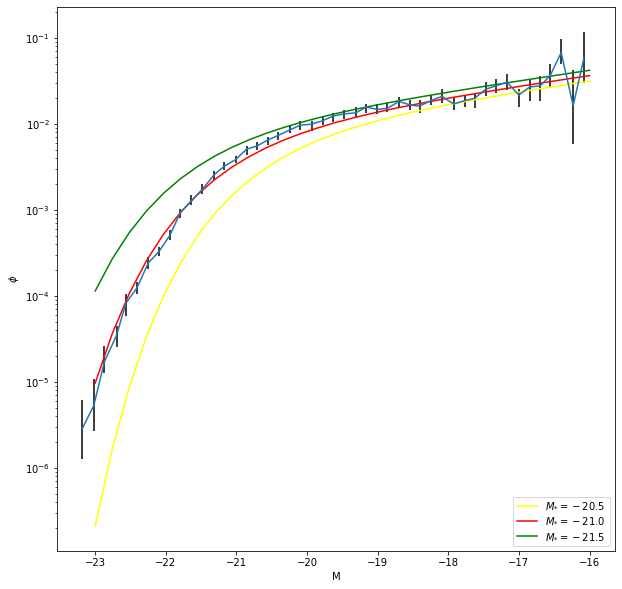

In [ ]:
#VARIEMOS M*
#Funciones y variables. 
th1 = [0.01,-21.0,-1.03]
th2 = [0.01,-20.5,-1.03]
th3 = [0.01,-21.5,-1.03]
#Grafico
plt.figure(figsize=(10,10))
plt.errorbar(df['MAG'],(df['PHI']),yerr=[df['error_inf'],df['error_sup']],ecolor='black')
plt.plot(mtest,sch(th2[0],th2[1],th2[2],mtest),color='yellow',label="$M_{*}=-20.5$")
plt.plot(mtest,sch(th1[0],th1[1],th1[2],mtest),color='red',label="$M_{*}=-21.0$")
plt.plot(mtest,sch(th3[0],th3[1],th3[2],mtest),color='green',label="$M_{*}=-21.5$")
plt.xlabel("M")
plt.ylabel("$\phi$")
plt.legend(loc='lower right')
plt.semilogy()
plt.show()

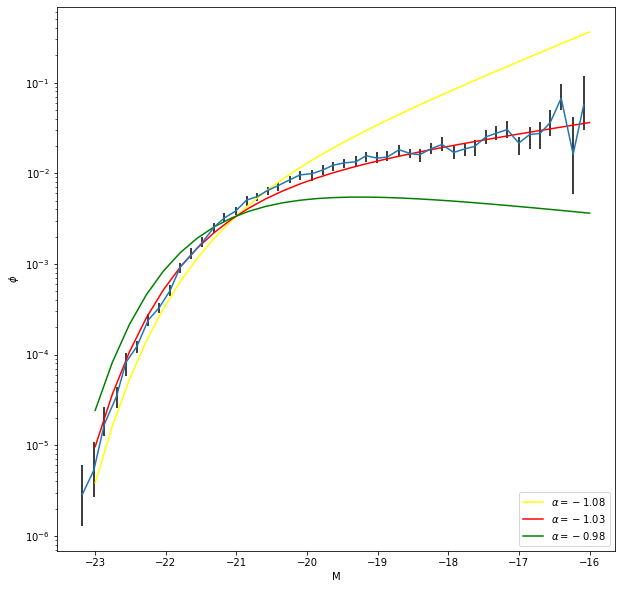

In [ ]:
#VARIEMOS ALPHA
#Funciones y variables. 
th1 = [0.01,-21.0,-1.03]
th2 = [0.01,-21.0,-1.08]
th3 = [0.01,-21.0,-0.98]
#Capaz hacer varios graficos en vez de uno con muchos cambios.
plt.figure(figsize=(10,10))
plt.errorbar(df['MAG'],(df['PHI']),yerr=[df['error_inf'],df['error_sup']],ecolor='black')
plt.plot(mtest,sch(th2[0],th2[1],th2[2],mtest),color='yellow',label="$\\alpha=-1.08$")
plt.plot(mtest,sch(th1[0],th1[1],th1[2],mtest),color='red',label="$\\alpha=-1.03$")
plt.plot(mtest,sch(th3[0],th3[1],th3[2],mtest),color='green',label="$\\alpha=-0.98$")
plt.xlabel("M")
plt.ylabel("$\phi$")
plt.legend(loc='lower right')
plt.semilogy()
plt.show()


Ahora definimos los límites para nuestro espacio de parámetros una vez que hemos experimentado: 

*   $0.005<\phi_{*}<0.015$
*   $-21.5<M_{*}<-20.5$
*   $-1.08< \alpha<0.98$



In [ ]:
#Espacio theta: 0=phi,1=M,2=alpha
philim1=0.005
philim2=0.015
mlim1=-21.5
mlim2=-20.5
alim1=-1.08
alim2=-0.98

Comencemos a definir las funciones bayesianas que necesitamos para el algoritmo MCMC: 

*   Función de Prior: Suposiciones acerca de los parámetros 
*   Función de Likelihood: Función proporcional a la probabilidad $p(d|\phi,m)$ de que los datos correspondan al modelo y sus correspondientes parámetros que estoy proponiendo. 
*   Función de Posterior: La función que usaremos para comparar entre valores en la cadena de Markov. Simplemente la suma del likelihood y el prior. 

Dado que función la de likelihood involucra productorias que pueden ser difíciles de computar y resolver, estaremos tomando el logaritmo de la misma para quedarnos con una sumatoria. Después de unas cuentas y simplificaciones, la expresión para la función logarítmica de likelihood se reduce a: 

$$ logLikelihood = ∑ \frac{(y_{i}-m(\theta_{i},x_{i}))^2}{\sigma_{i}} $$

Donde $m(\theta_{i},x_{i})$ es el modelo que yo busco ajustar, en nuestro caso la **función de Schechter**. $σ$ corresponde a los errores asociados a los datos. Esta función es la que buscaremos minimizar mediante MCMC.

In [ ]:
#Defino el prior para que me filtre parametros muy extremos. Como vamos a estar tomando el logaritmo del prior en el posterior, quiero que para los valores fuera del límite
#el prior me devuelva valores muy altos debido a que vamos estar buscando minimizar el posterior.
def prior(x):
  #Defino mis regiones de exploración.
  if(0.005<x[0]<0.015 and -21.5<x[1]<-20.5 and -1.08<x[2]<-0.98):
    y=1.0 
  else:
    y=500000000
  return(y)

#Defino log-likelihood

def log_like(y,x1,x2,x3,x4):
  numer = (x4-sch(y[0],y[1],y[2],x1))**2 
  denom = (x2+x3)/2
  return np.sum(numer/denom)

#Defino posterior

def posterior(y,x1,x2,x3,x4,prior): 
    p = log_like(y,x1,x2,x3,x4) + np.log(prior(y))
    return p

Ahora, definimos el algoritmo MCMC. Vamos a buscar calcular para cada punto su posterior y selectivamente tomar aquellos que lo minimicen. No obstante, no descartamos aquellos que no lo minimicen y le damos una chance aleatoria al algoritmo de recorrerlos. Los parámetros del algoritmo serán las condiciones iniciales y la cantidad de iteraciones.

In [ ]:
def metro_has(th0,markov):
  #Defino dos matrices: Una en la que escribiré los parámetros finales y otra temporal en la que van los parámetros propuestos para comparar. 
  th=np.zeros((markov,4))
  th_new=np.zeros((markov,4))
  #La primera línea de la matriz contiene los parámetros iniciales
  th[0][0:3]=th0
  #Y su respectiva likelihood.
  th[0][3]=np.exp(posterior(th0,df['MAG'],df['error_inf'],df['error_sup'],df['PHI'],prior))
  for i in range(1,markov):
    #Defino la función de saltos con los saltos máximos utilizando los límites
    th_new[i-1][0]= th[i-1][0] + (np.random.uniform(low=-1.,high=1.)*((philim1-philim2))/100)
    th_new[i-1][1]= th[i-1][1] + (np.random.uniform(low=-1.,high=1.)*((mlim2-mlim1))/100)
    th_new[i-1][2]= th[i-1][2] + (np.random.uniform(low=-1.,high=1.)*((alim2-alim1))/100)
    #Calculo los posterior del nuevo y el viejo
    a1=posterior(th[i-1][0:3],df['MAG'],df['error_inf'],df['error_sup'],df['PHI'],prior)
    a2=posterior(th_new[i-1][0:3],df['MAG'],df['error_inf'],df['error_sup'],df['PHI'],prior)
    #los exponencio a los log-likelihood para compararlos
    aa1=np.exp(a1)
    aa2=np.exp(a2)
    #Si el posterior es menor en la nueva posición propuesta, lo tomo.
    if (aa2 < aa1):
      th[i][0:3]=th_new[i-1][0:3]
      th[i][3]=aa2
    else:
      #En el caso de que no lo sea, dejo que se mida ante un número aleatorio. 
      draw = np.random.rand()
      if (aa2 < draw):
        th[i][0:3]=th_new[i-1][0:3]
        th[i][3]=aa2
      else:
        th[i][0:3]=th[i-1][0:3]
        th[i][3]=aa1
  return(np.array(th))


## **Ejercicio #*3***

Ahora, observemos las propiedades de convergencia de las cadenas con diversas condiciones iniciales para ver qué podemos discernir del comportamiento del algoritmo. 

In [ ]:
th0 = [0.012,-20.6,-0.99]
pp0 = metro_has(th0,1200)
th1 = [0.007,-21.0,-1.0]
pp1 = metro_has(th1,1200)
th2 = [0.01,-20.8,-1.02]
pp2 = metro_has(th2,1200)
th3 = [0.014,-21.4,-1.04]
pp3 = metro_has(th3,1200)
th4 = [0.009,-21.2,-1.06]
pp4 = metro_has(th4,1200)

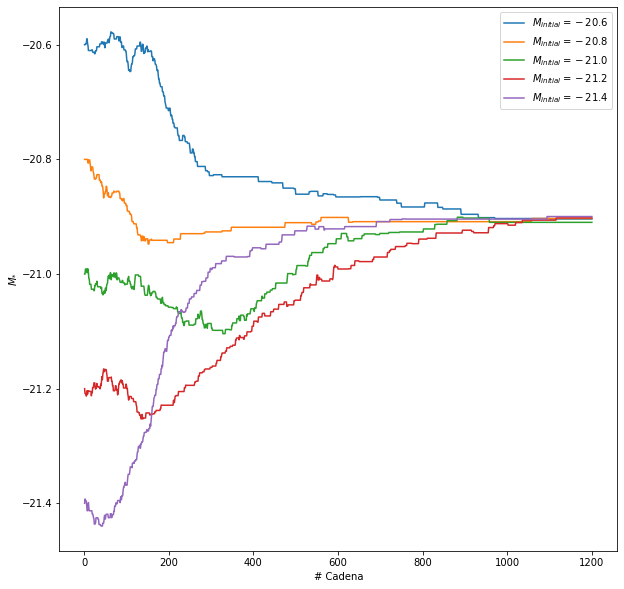

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(1,1201),pp0[:,1],label='$M_{initial}=-20.6$')
plt.plot(np.arange(1,1201),pp2[:,1],label='$M_{initial}=-20.8$')
plt.plot(np.arange(1,1201),pp1[:,1],label='$M_{initial}=-21.0$')
plt.plot(np.arange(1,1201),pp4[:,1],label='$M_{initial}=-21.2$')
plt.plot(np.arange(1,1201),pp3[:,1],label='$M_{initial}=-21.4$')
plt.xlabel("# Cadena")
plt.ylabel("$M_{*}$")
plt.legend()
plt.show()

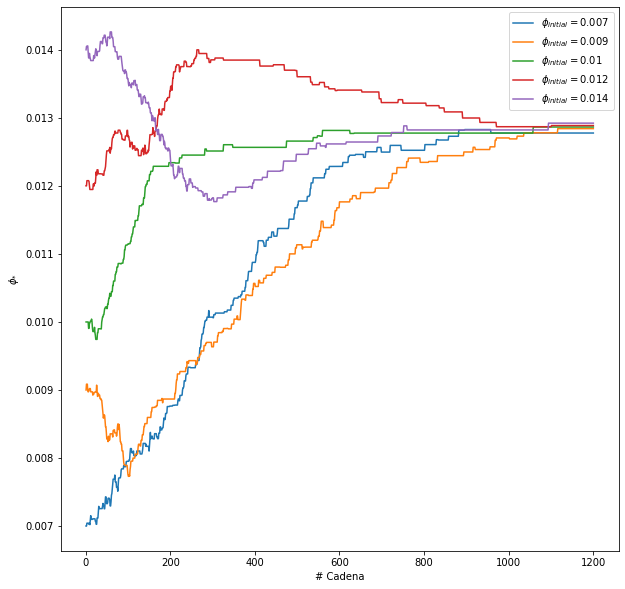

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(1,1201),pp1[:,0],label='$\phi_{initial}=0.007$')
plt.plot(np.arange(1,1201),pp4[:,0],label='$\phi_{initial}=0.009$')
plt.plot(np.arange(1,1201),pp2[:,0],label='$\phi_{initial}=0.01$')
plt.plot(np.arange(1,1201),pp0[:,0],label='$\phi_{initial}=0.012$')
plt.plot(np.arange(1,1201),pp3[:,0],label='$\phi_{initial}=0.014$')
plt.xlabel("# Cadena")
plt.ylabel("$\phi_{*}$")
plt.legend()
plt.show()

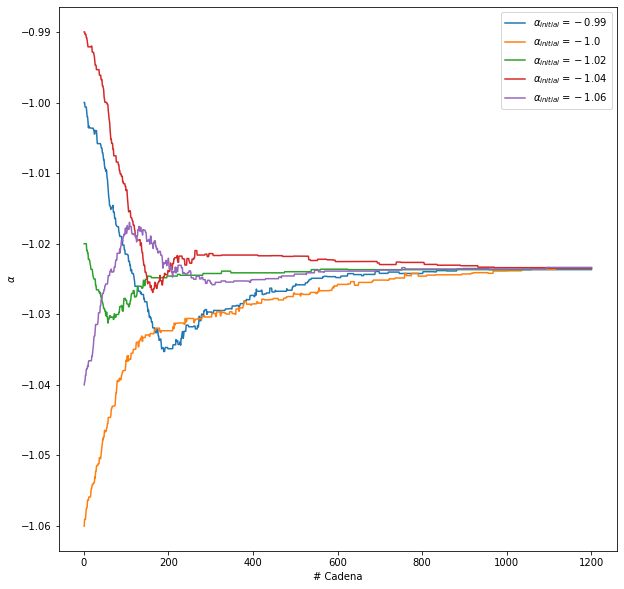

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(1,1201),pp1[:,2],label='$\\alpha_{initial}=-0.99$')
plt.plot(np.arange(1,1201),pp4[:,2],label='$\\alpha_{initial}=-1.0$')
plt.plot(np.arange(1,1201),pp2[:,2],label='$\\alpha_{initial}=-1.02$')
plt.plot(np.arange(1,1201),pp0[:,2],label='$\\alpha_{initial}=-1.04$')
plt.plot(np.arange(1,1201),pp3[:,2],label='$\\alpha_{initial}=-1.06$')
plt.xlabel("# Cadena")
plt.ylabel("$\\alpha$")
plt.legend()
plt.show()

El mixing de las cadenas parece bueno sin importar las condiciones iniciales, comenzando a estabilizarse y converger aproximadamente a partir de las 200 cadenas. Elegiremos las condiciones iniciales para los cuales la cadena parece converger al valor medio de los parametros finales elegidos por las 5 cadenas: $\theta_{i} = (0.01,-21.4,-1.02)$ donde $\theta = (\phi_{*},M_{*},\alpha)$

## **Ejercicio #*4***

Con esta elección de parámetros, corremos varias cadenas y observamos los valores obtenidos para los parámetros así como sus dispersiones y el ajuste que producen sobre los datos.*italicised text*

In [ ]:
thh0 = [0.01,-21.4,-1.02]
pph0 = metro_has(thh0,1200)
thh1 = [0.01,-21.4,-1.02]
pph1 = metro_has(thh1,1200)
thh2 = [0.01,-21.4,-1.02]
pph2 = metro_has(thh2,1200)
thh3 = [0.01,-21.4,-1.02]
pph3 = metro_has(thh3,1200)
thh4 = [0.01,-21.4,-1.02]
pph4 = metro_has(thh4,1200)

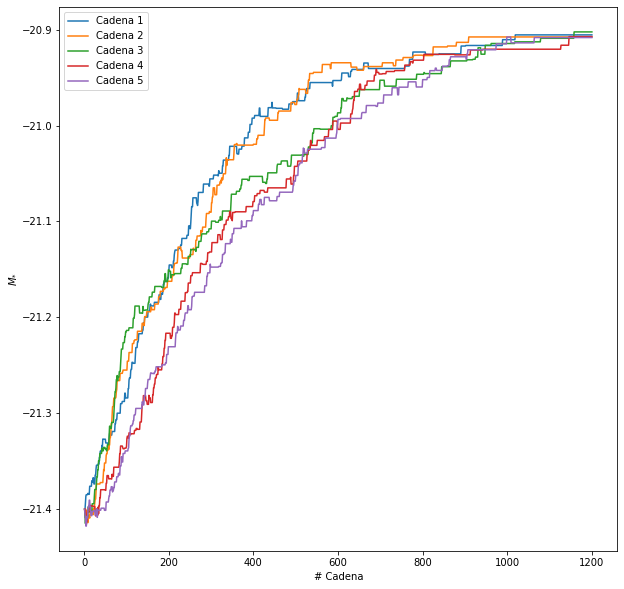

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(1,1201),pph0[:,1],label='Cadena 1')
plt.plot(np.arange(1,1201),pph1[:,1],label='Cadena 2')
plt.plot(np.arange(1,1201),pph2[:,1],label='Cadena 3')
plt.plot(np.arange(1,1201),pph3[:,1],label='Cadena 4')
plt.plot(np.arange(1,1201),pph4[:,1],label='Cadena 5')
plt.xlabel("# Cadena")
plt.ylabel("$M_{*}$")
plt.legend()
plt.show()

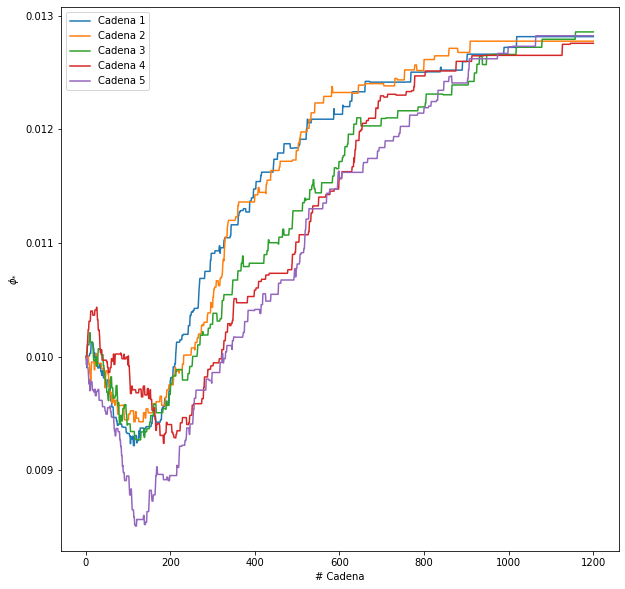

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(1,1201),pph0[:,0],label='Cadena 1')
plt.plot(np.arange(1,1201),pph1[:,0],label='Cadena 2')
plt.plot(np.arange(1,1201),pph2[:,0],label='Cadena 3')
plt.plot(np.arange(1,1201),pph3[:,0],label='Cadena 4')
plt.plot(np.arange(1,1201),pph4[:,0],label='Cadena 5')
plt.xlabel("# Cadena")
plt.ylabel("$\phi_{*}$")
plt.legend()
plt.show()

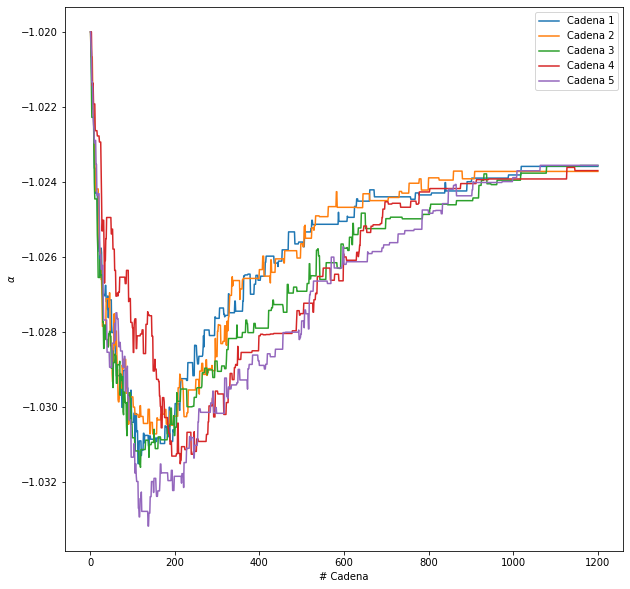

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(1,1201),pph0[:,2],label='Cadena 1')
plt.plot(np.arange(1,1201),pph1[:,2],label='Cadena 2')
plt.plot(np.arange(1,1201),pph2[:,2],label='Cadena 3')
plt.plot(np.arange(1,1201),pph3[:,2],label='Cadena 4')
plt.plot(np.arange(1,1201),pph4[:,2],label='Cadena 5')
plt.xlabel("# Cadena")
plt.ylabel("$\\alpha$")
plt.legend()
plt.show()

Tomemos los últimos valores estables de cada cadena y calculemos sus medias y dispersiones. 

In [ ]:
phi_mcmc = (pph0[1199,0],pph1[1199,0],pph2[1199,0],pph3[1199,0],pph4[1199,0])
m_mcmc = (pph0[1199,1],pph1[1199,1],pph2[1199,1],pph3[1199,1],pph4[1199,1])
a_mcmc = (pph0[1199,2],pph1[1199,2],pph2[1199,2],pph3[1199,2],pph4[1199,2])

phmc=(np.average(phi_mcmc),np.std(phi_mcmc))
mmc=(np.average(m_mcmc),np.std(m_mcmc))
amc=(np.average(a_mcmc),np.std(a_mcmc))

print(phmc)
print(mmc)
print(amc)

(0.012804407605217196, 3.553553499698024e-05)
(-20.906190469284546, 0.002127377519898109)
(-1.0236269446257866, 7.010780913654277e-05)


Con esto, los valores de nuestros parámetros según el algoritmo de MCMC son: 

$$\phi_{*MCMC}=(0.01280\pm0.00003)$$

$$M_{*MCMC}=(-20.906\pm0.002)$$

$$\alpha_{MCMC}=(-1.02362\pm0.00007)$$

Procedemos a visualizar qué forma tiene el ajuste propuesto por estos valores.

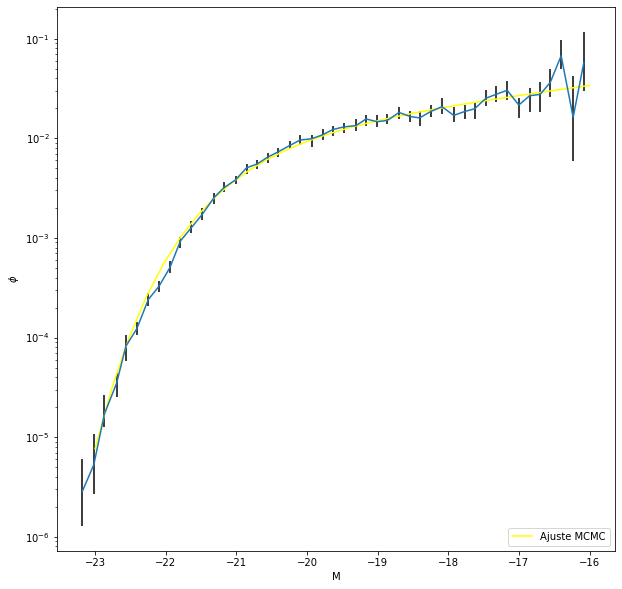

In [ ]:
thmcmc=(phmc[0],mmc[0],amc[0])
plt.figure(figsize=(10,10))
plt.errorbar(df['MAG'],(df['PHI']),yerr=[df['error_inf'],df['error_sup']],ecolor='black')
plt.plot(mtest,sch(thmcmc[0],thmcmc[1],thmcmc[2],mtest),color='yellow',label="Ajuste MCMC")
plt.xlabel("M")
plt.ylabel("$\phi$")
plt.legend(loc='lower right')
plt.semilogy()
plt.show()

## **Ejercicio #*5***
El método de la gradiente descendiente es un algoritmo que busca el mínimo de una función a través de su gradiente. En términos teóricos y de implementación es sencillo: Propongo un valor $x_{i}$ para la función $f(x_{i})$ que busco minimizar, calculo $\overrightarrow{\nabla} f(x_{i})$ en ese punto y propongo un nuevo valor $x_{new}=x - \epsilon \left(\frac{\overrightarrow{\nabla} f(x)\cdot \overrightarrow{x}}{|\overrightarrow{\nabla}f(x)|}  \right)$ para que el proceso continue de forma iterativa. Donde $\epsilon$ es la "taza de aprendizaje" del algoritmo.

En nuestro caso, estamos buscando explorar un espacio de parámetros tridimensional por lo que hemos de calcular el gradiente y su proyección sobre las direcciones de cada una de las variables. Lo que nos importa es la dirección, no el valor del gradiente en sí.

La función a calcular el gradiente es la de *likelihood logarítimica* que hemos usado en MCMC. 

$$ logLikelihood = ∑ \frac{(y_{i}-m(\theta_{i},x_{i}))^2}{\sigma_{i}} $$

La cual calcularemos de forma analítica. 

In [ ]:
#Paquetes 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Importo datos de pandas aca 
df = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/Colab Notebooks/datos.csv')

#Copio y pego la definición de Schechter para tenerla a mano
def sch(th0,th1,th2,x):
  sch1 = 10**(-4*(x-th1)*(th2+1))
  sch2 = np.exp(-10**(-0.4*(x-th1)))
  return 0.4*np.log(10)*th0*sch1*sch2

In [ ]:
#Espacio theta: 0=phi,1=M,2=alpha
#Defino la derivada de schechter respecto de phi*
def phigrad(y,x1):
  p = sch(y[0],y[1],y[2],x1)/y[0] 
  return(p)
#Defino la derivada de schechter respecto de M*
def mgrad(y,x1):
  p = sch(y[0],y[1],y[2],x1)*np.log(10)*0.4*((y[2]+1)-10**((-0.4)*(x1-y[1])))
  return(p)
#Defino la derivada de schechter respecto de alpha
def agrad(y,x1):
  p = sch(y[0],y[1],y[2],x1)*np.log(10)*(-0.4)*(x1-y[1])
  return(p)
#Defino la función gradiente logaritmico
def gradlog(y,x1,x2,x3,x4,delf):
  numer = (x4-sch(y[0],y[1],y[2],x1))*delf(y,x1)
  denom = ((x2+x3)/2)**2
  return -np.sum(numer/denom)
#Defino el algoritmo gradiente descendiente. 
def descendgrad(th0,n):
  th=np.zeros((n,4))
  th[0][0:3]=th0
  th[0][3]= log_like(th0[0:3],df['MAG'],df['error_inf'],df['error_sup'],df['PHI'])
  for i in range(1,n):
    g1 = gradlog(th[i-1][0:3],df['MAG'],df['error_inf'],df['error_sup'],df['PHI'],phigrad)
    g2 = gradlog(th[i-1][0:3],df['MAG'],df['error_inf'],df['error_sup'],df['PHI'],mgrad)
    g3 = gradlog(th[i-1][0:3],df['MAG'],df['error_inf'],df['error_sup'],df['PHI'],agrad)
    modu = np.sqrt((g1**2)+(g2**2)+(g3**2))
    th[i][0]= th[i-1][0] - 0.0001*(g1/modu)
    th[i][1]= th[i-1][1] - 0.1*(g2/modu)
    th[i][2]= th[i-1][2] - 0.001*(g3/modu)
    th[i][3]= log_like(th[i-1][0:3],df['MAG'],df['error_inf'],df['error_sup'],df['PHI'])
  return(np.array(th))

## **Ejercicio #6**
Ahora, con esto usamos las mismas condiciones iniciales utilizadas para el algoritmo MCMC para ver a qué parámetros converge el algoritmo y comparar.

In [ ]:
th0 = [0.012,-20.6,-0.99]
ll0 = descendgrad(th0,1200)
th1 = [0.007,-21.0,-1.0]
ll1 = descendgrad(th1,1200)
th2 = [0.01,-20.8,-1.02]
ll2 = descendgrad(th2,1200)
th3 = [0.014,-21.4,-1.04]
ll3 = descendgrad(th3,1200)
th4 = [0.009,-21.2,-1.06]
ll4 = descendgrad(th4,1200)

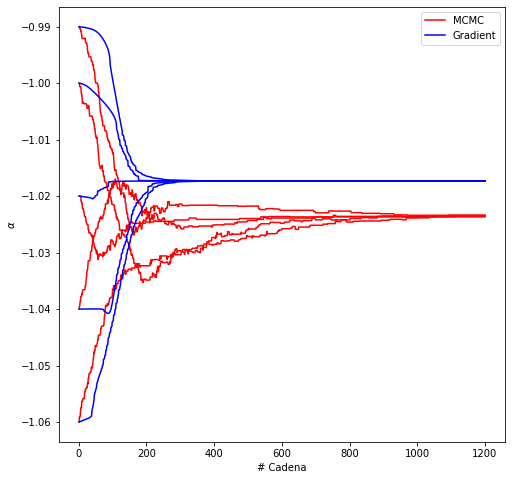

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(1,1201),pp0[:,2],color="red",label='MCMC')
plt.plot(np.arange(1,1201),pp2[:,2],color="red")
plt.plot(np.arange(1,1201),pp1[:,2],color="red")
plt.plot(np.arange(1,1201),pp4[:,2],color="red")
plt.plot(np.arange(1,1201),pp3[:,2],color="red")
plt.plot(np.arange(1,1201),ll0[:,2],color="blue",label='Gradient')
plt.plot(np.arange(1,1201),ll1[:,2],color="blue")
plt.plot(np.arange(1,1201),ll2[:,2],color="blue")
plt.plot(np.arange(1,1201),ll3[:,2],color="blue")
plt.plot(np.arange(1,1201),ll4[:,2],color="blue")
plt.xlabel("# Cadena")
plt.ylabel("$\\alpha$")
plt.legend()
plt.show()

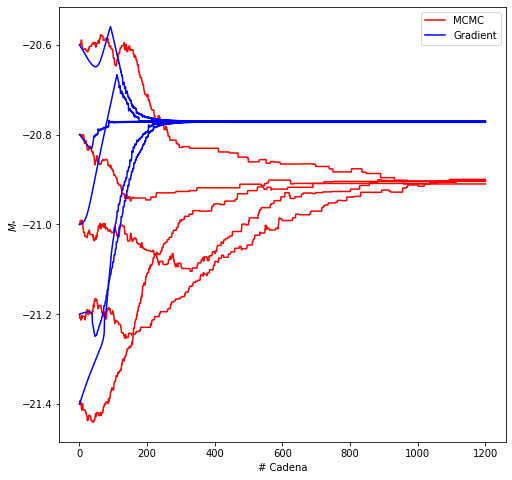

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(1,1201),pp0[:,1],color="red",label='MCMC')
plt.plot(np.arange(1,1201),pp2[:,1],color="red")
plt.plot(np.arange(1,1201),pp1[:,1],color="red")
plt.plot(np.arange(1,1201),pp4[:,1],color="red")
plt.plot(np.arange(1,1201),pp3[:,1],color="red")
plt.plot(np.arange(1,1201),ll0[:,1],color="blue",label='Gradient')
plt.plot(np.arange(1,1201),ll1[:,1],color="blue")
plt.plot(np.arange(1,1201),ll2[:,1],color="blue")
plt.plot(np.arange(1,1201),ll3[:,1],color="blue")
plt.plot(np.arange(1,1201),ll4[:,1],color="blue")
plt.xlabel("# Cadena")
plt.ylabel("$M_{*}$")
plt.legend()
plt.show()

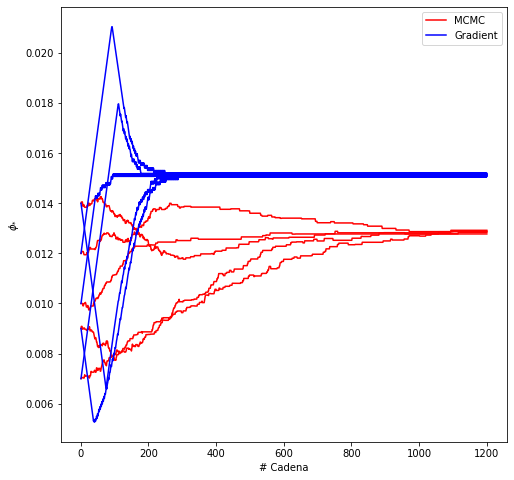

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(1,1201),pp0[:,0],color="red",label='MCMC')
plt.plot(np.arange(1,1201),pp2[:,0],color="red")
plt.plot(np.arange(1,1201),pp1[:,0],color="red")
plt.plot(np.arange(1,1201),pp4[:,0],color="red")
plt.plot(np.arange(1,1201),pp3[:,0],color="red")
plt.plot(np.arange(1,1201),ll0[:,0],color="blue",label='Gradient')
plt.plot(np.arange(1,1201),ll1[:,0],color="blue")
plt.plot(np.arange(1,1201),ll2[:,0],color="blue")
plt.plot(np.arange(1,1201),ll3[:,0],color="blue")
plt.plot(np.arange(1,1201),ll4[:,0],color="blue")
plt.xlabel("# Cadena")
plt.ylabel("$\phi_{*}$")
plt.legend()
plt.show()

Repitamos el proceso que hicimos para MCMC, tomando el mismo conjunto de valores iniciales, promediando los últimos valores estables y calculando su desviación estandard. Después, grafiquemos la curva resultante para contrastar los parámetros encontrados por ambos algoritmos. 

In [ ]:
thh0 = [0.01,-21.4,-1.02]
llh0 = descendgrad(thh0,1200)
thh1 = [0.01,-21.4,-1.02]
llh1 = descendgrad(thh1,1200)
thh2 = [0.01,-21.4,-1.02]
llh2 = descendgrad(thh2,1200)
thh3 = [0.01,-21.4,-1.02]
llh3 = descendgrad(thh3,1200)
thh4 = [0.01,-21.4,-1.02]
llh4 = descendgrad(thh4,1200)

In [ ]:
phi_gr = (llh0[1199,0],llh1[1199,0],llh2[1199,0],llh3[1199,0],llh4[1199,0])
m_gr = (llh0[1199,1],llh1[1199,1],llh2[1199,1],llh3[1199,1],llh4[1199,1])
a_gr = (llh0[1199,2],llh1[1199,2],llh2[1199,2],llh3[1199,2],llh4[1199,2])

phgr=(np.average(phi_gr),np.std(phi_gr))
mgr=(np.average(m_gr),np.std(m_gr))
agr=(np.average(a_gr),np.std(a_gr))

print(phgr)
print(mgr)
print(agr)

(0.015045166510273201, 0.0)
(-20.76965530464982, 0.0)
(-1.0173085313891106, 0.0)


$$\phi_{*GD}=(0.015)$$

$$M_{*GD}=(-20.77)$$

$$\alpha_{GD}=(-1.02)$$



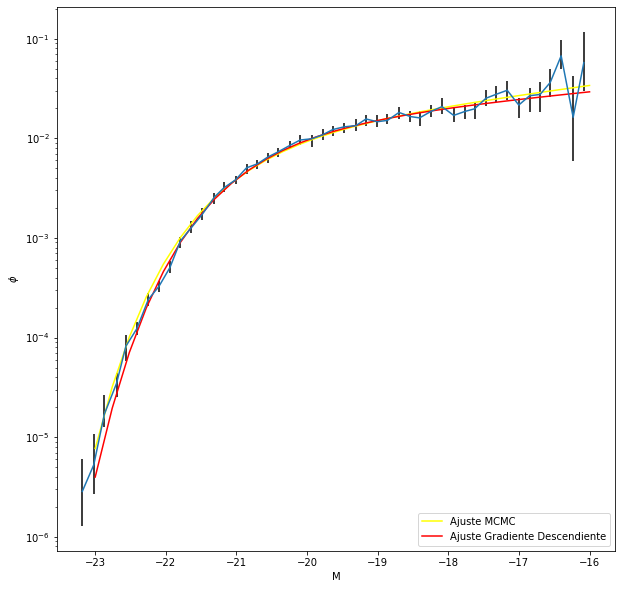

In [ ]:
thgr=(phgr[0],mgr[0],agr[0])
plt.figure(figsize=(10,10))
plt.errorbar(df['MAG'],(df['PHI']),yerr=[df['error_inf'],df['error_sup']],ecolor='black')
plt.plot(mtest,sch(thmcmc[0],thmcmc[1],thmcmc[2],mtest),color='yellow',label="Ajuste MCMC")
plt.plot(mtest,sch(thgr[0],thgr[1],thgr[2],mtest),color='red',label="Ajuste Gradiente Descendiente")
plt.xlabel("M")
plt.ylabel("$\phi$")
plt.legend(loc='lower right')
plt.semilogy()
plt.show()